## Baseline model with both info from the source and target country as features

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from prepare_data import get_data

In [23]:
based_on = None
data = get_data(based_on=based_on)
data.merge_data()
df_merged = data.df_merged
print(df_merged.columns)
print(df_merged.shape)

Index(['Carbon Emissions_x', 'Education Expenditure_x',
       'Foreign Direct Investment (FDI) Inflows_x', 'GDP_x',
       'Health Expenditure_x', 'Inflation Rate_x', 'Internet Penetration_x',
       'Life Expectancy_x', 'Renewable Energy Production_x',
       'Unemployment Rate_x', 'Carbon Emissions_y', 'Education Expenditure_y',
       'Foreign Direct Investment (FDI) Inflows_y', 'GDP_y',
       'Health Expenditure_y', 'Inflation Rate_y', 'Internet Penetration_y',
       'Life Expectancy_y', 'Renewable Energy Production_y',
       'Unemployment Rate_y', 'Value'],
      dtype='object')
(14742, 21)


In [29]:
mode = "reg"

data.create_X_y(q=3,mode=mode)
data.split(test_size=0.2)

X_train = data.X_train
y_train = data.y_train
X_test = data.X_test
y_test = data.y_test

# XGBoost

In [30]:
if mode=="reg":
    # Define the XGBoost model
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
else:
    model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

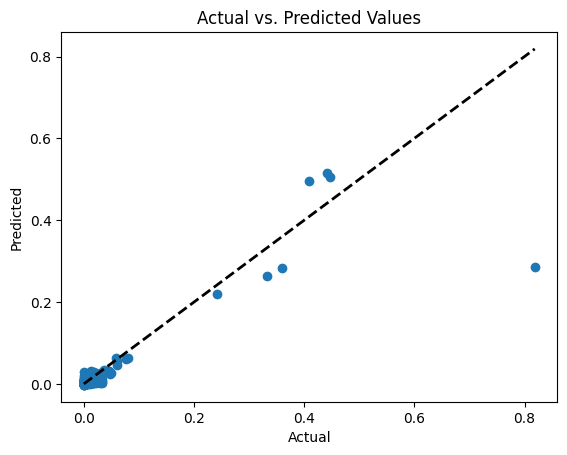

Mean Squared Error: 0.00011181941032086917


In [31]:
if mode=="class":
    # Calculate evaluation metrics
    classification_metrics = classification_report(y_test, y_pred)
    print("Classification Report:\n", classification_metrics)
else:
    # Plot the actual vs. predicted values for the test data
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

# Randomforest

In [32]:
if mode=="reg":
    # Define the Random Forest model
    model = RandomForestRegressor()
else:
    model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

C:\Users\marti\AppData\Local\Temp\ipykernel_17004\902029453.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


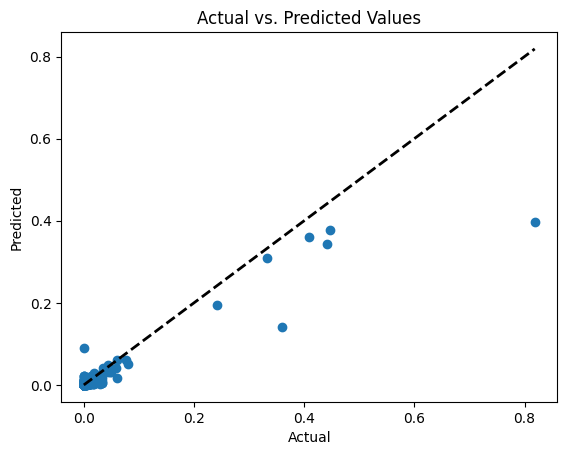

Mean Squared Error: 9.195532722727347e-05


In [33]:
if mode=="class":
    # Calculate evaluation metrics
    classification_metrics = classification_report(y_test, y_pred)
    print("Classification Report:\n", classification_metrics)
else:
    # Plot the actual vs. predicted values for the test data
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)